In [1]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import contextily

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/9t/_sm_x0m957lf5z6q_l21z3dm0000gn/T/ipykernel_14814/4125265877.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get 

In [12]:
municipiosSP = gpd.read_file('../data/SIRGAS_limites_municipios_estado_sao_paulo/SIRGAS_limites_municipais.shp')

In [13]:
municipiosSP.head(5)

,limite_id,municipio,Geometry_s,geometry
0,1,ITANHAÉM,1J6s,"POLYGON ((307339.109 7316497.555, 306260.118 7..."
1,10,EMBU-GUAÇU,1J6tf,"POLYGON ((306250.297 7350903.625, 306194.975 7..."
2,100,ITUVERAVA,NaN,"POLYGON ((194518.637 7762304.185, 194541.437 7..."
3,101,JABORANDI,NaN,"POLYGON ((142127.776 7701403.306, 142041.293 7..."
4,102,JABOTICABAL,NaN,"POLYGON ((150695.076 7658574.445, 150773.090 7..."


<Axes: >

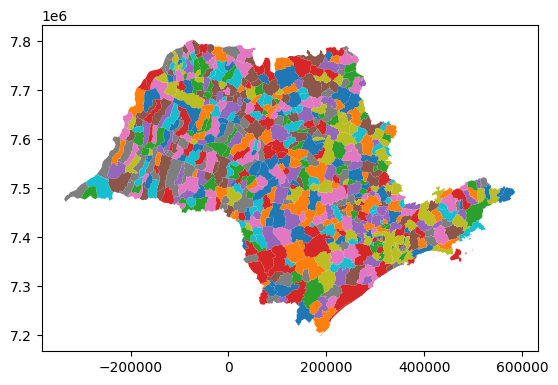

In [14]:
municipiosSP.plot(column="municipio")

In [15]:
municipiosSP.crs

In [16]:
estacoes = gpd.read_file("../data/SIRGAS_SHP_estacaometro/SIRGAS_SHP_estacaometro_point.shp")

In [17]:
estacoes.head(5)

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349839.380 7395675.047)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348457.592 7395884.165)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346732.712 7396874.617)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345181.965 7397070.921)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343708.935 7396765.736)


In [18]:
estacoes.crs

In [10]:
# estacoes = estacoes.set_crs('SIRGAS2000')
# municipiosSP = municipiosSP.set_crs('SIRGAS2000')

<Axes: >

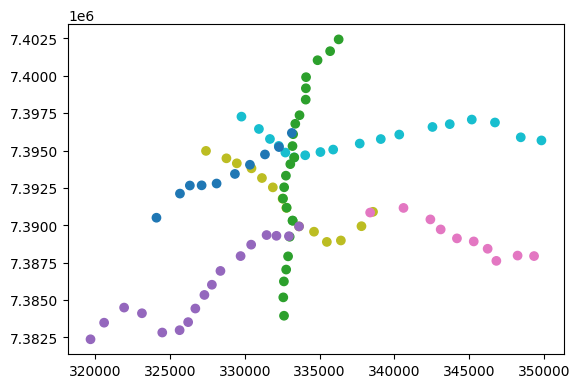

In [20]:
estacoes.plot(column="emt_linha")

In [21]:
SP = municipiosSP.query("municipio == 'SÃO PAULO'")

,limite_id,municipio,Geometry_s,geometry
700,27,SÃO PAULO,1J6tN,"POLYGON ((325466.447 7409331.257, 325486.462 7..."


<Axes: >

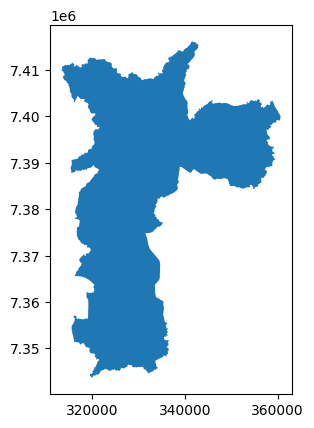

In [22]:
SP.plot()

In [24]:
SP = SP.set_crs("SIRGAS2000")

In [26]:
ajusta_cor = {'AZUL': 'blue', 'VERDE': 'green', 'VERMELHA': 'red', 'ROXO': 'purple', 'AMARELA': 'yellow', 'MARROM': 'brown', 'LILAS': 'violet', 'PRETO': 'black', 'PRATA': 'silver', 'LARANJA': 'orange', 'BRANCO': 'white'}

In [32]:
# substituindo as cores pelo nome da cor em inglês
estacoes['cor'] = estacoes['emt_linha'].map(ajusta_cor)
estacoes.value_counts('cor')

cor
blue      24
red       18
violet    17
green     14
silver    10
yellow    10
Name: count, dtype: int64

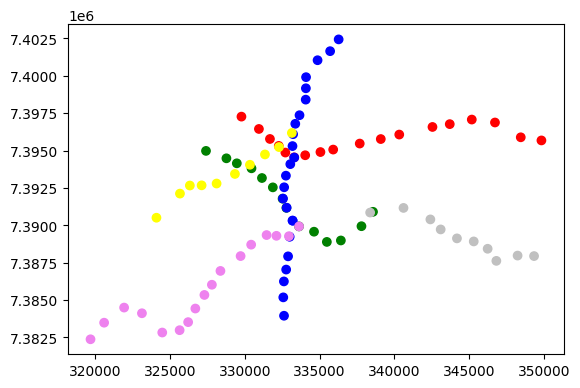

In [31]:
estacoes.plot(color=estacoes['cor']);

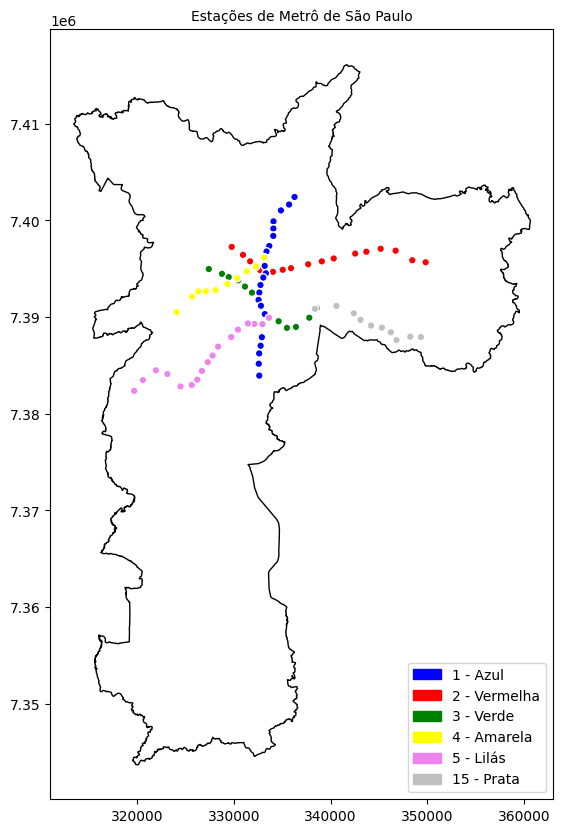

In [39]:
import matplotlib.patches as mpatches

azul = mpatches.Patch(color='blue', label='1 - Azul')
vermelha = mpatches.Patch(color='red', label='2 - Vermelha')
verde = mpatches.Patch(color='green', label='3 - Verde')
amarela = mpatches.Patch(color='yellow', label='4 - Amarela')
lilas = mpatches.Patch(color='violet', label='5 - Lilás')
prata = mpatches.Patch(color='silver', label='15 - Prata')

fig, grafico = plt.subplots(figsize=(10, 10))
SP.plot(ax=grafico, color='white', edgecolor='black')
estacoes.plot(ax=grafico, color=estacoes['cor'], edgecolor="white", markersize=30)
plt.title("Estações de Metrô de São Paulo", fontsize=10)
plt.legend(handles=[azul, vermelha, verde, amarela, lilas, prata], loc='lower right', fontsize=10)
plt.show();

In [40]:
estacoes2 = estacoes.set_crs("EPSG:31983", allow_override=True)

In [41]:
SP2 = SP.set_crs("EPSG:31983", allow_override=True)

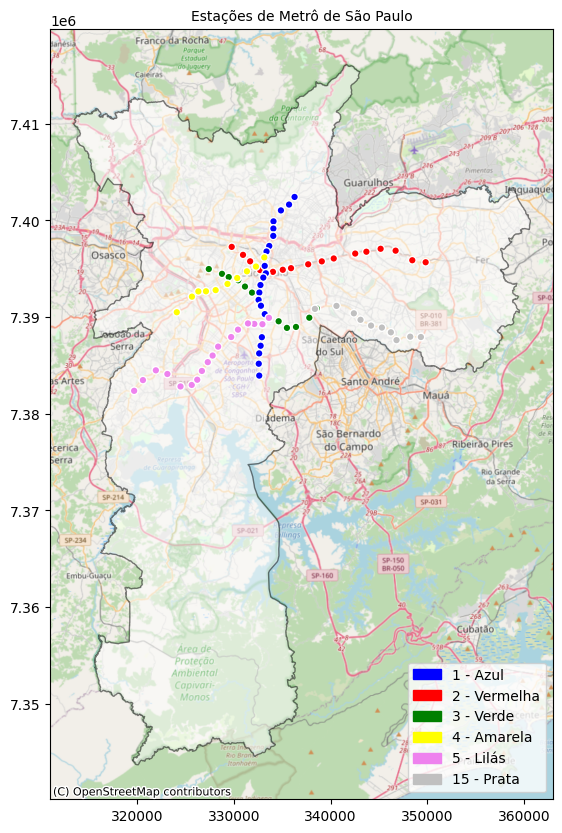

In [49]:
fig, grafico = plt.subplots(figsize=(10, 10))
SP2.plot(ax=grafico, color='white', edgecolor='black', alpha=0.5)
estacoes2.plot(ax=grafico, color=estacoes['cor'], edgecolor="white", markersize=30)
plt.title("Estações de Metrô de São Paulo", fontsize=10)
contextily.add_basemap(grafico, crs=SP2.crs.to_string(), source=contextily.providers.OpenStreetMap.Mapnik)
plt.legend(handles=[azul, vermelha, verde, amarela, lilas, prata], loc='lower right', fontsize=10)
plt.show();